## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and removing columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\admin\Desktop\New York rentals Dataset'

In [4]:
# Import the new york rental properties pricing

df_rentals = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'rental_merged_new.csv'))

In [5]:
df_rentals.shape

(17614, 13)

In [6]:
df_rentals.head()

,Unnamed: 0,id,neighborhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020,Price category
0,0,2595,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1,Middle price
1,1,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1,Low price
2,2,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19,Middle price
3,3,5121,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365,Low price
4,4,5178,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242,Low price


In [7]:
# we use this code to drop unnecessary column

df_rentals.drop('Unnamed: 0', axis=1, inplace=True)

### 2. The elbow technique

In [8]:
# Select only numeric columns from df_rentals
df_numeric = df_rentals.select_dtypes(include=['float64', 'int64'])

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df_numeric).score(df_numeric) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-1.6381801618381855e+18,
 -3.8000913062988435e+17,
 -1.6329657301453306e+17,
 -8.848124564864435e+16,
 -5.250656429805869e+16,
 -3.8430928056306136e+16,
 -2.724697050052236e+16,
 -2.009788028489235e+16,
 -1.6069457472994872e+16]

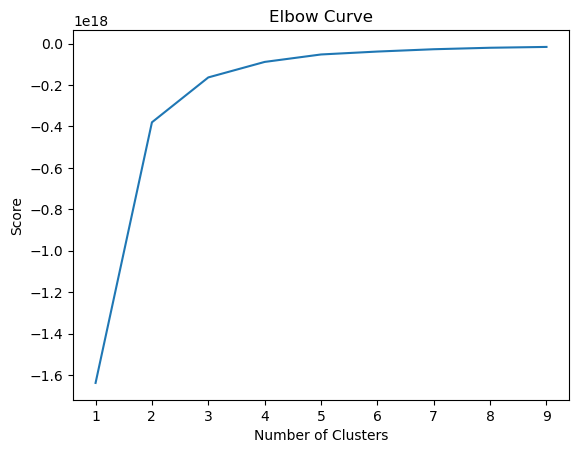

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for my clusters is three.

##### I can also see that it jumps rapidly from two to three on the x-axis, then rises only slightly after three. What does this mean? That the optimal count for my clusters is just that—three.

### 3. k-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df_numeric)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [14]:
df_numeric['clusters'] = kmeans.fit_predict(df_numeric)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
df_numeric.head()

,id,latitude,longitude,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020,clusters
0,2595,40.75362,-73.98377,225,15,10,48,0.39,1,1
1,3831,40.68514,-73.95976,89,188,1,295,4.67,1,1
2,5099,40.74767,-73.97500,200,362,3,78,0.60,19,1
3,5121,40.68688,-73.95596,60,0,29,49,0.38,365,1
4,5178,40.76489,-73.98493,79,141,2,454,3.52,242,1


In [16]:
# check how many observations fall into each cluster via the value_counts() function:

df_numeric['clusters'].value_counts()

clusters
0    6059
1    5981
2    5574
Name: count, dtype: int64

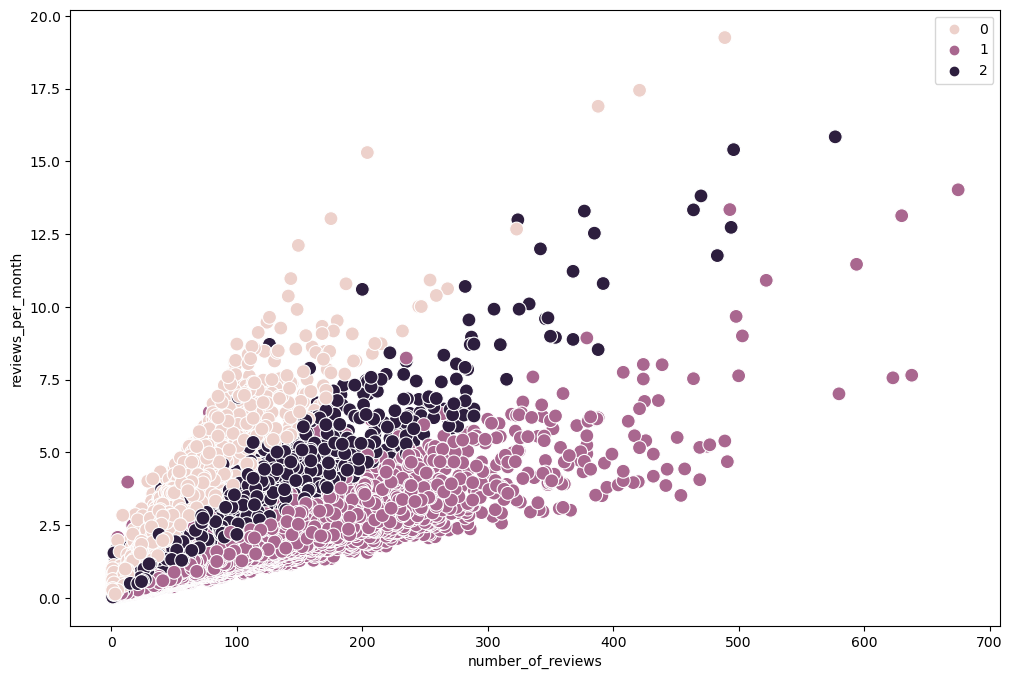

In [17]:
# Plot the clusters for the "reviews per month" and "number of reviews" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['number_of_reviews'], y=df_numeric['reviews_per_month'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('number_of_reviews') # Label x-axis.
plt.ylabel('reviews_per_month') # Label y-axis.
plt.show()

##### Cluster 0 (light pink): Most data points in this cluster have a lower number of reviews and reviews per month, suggesting these may be newer or less frequently reviewed listings. Cluster 1 (medium purple): This cluster occupies the middle range of both axes, indicating a moderate level of activity in terms of reviews and frequency. Cluster 2 (dark purple): This cluster shows a higher number of reviews and reviews per month, which could represent more popular or established listings. 
##### The clustering makes sense as it separates listings based on their activity and popularity. However, there's an overlap between clusters 0 and 1, and a clear boundary isn't visible. Additionally, there are outliers in cluster 2 with a high number of reviews but a lower frequency of reviews per month, which could be older listings that have accumulated reviews over a long period but aren't actively reviewed recently.

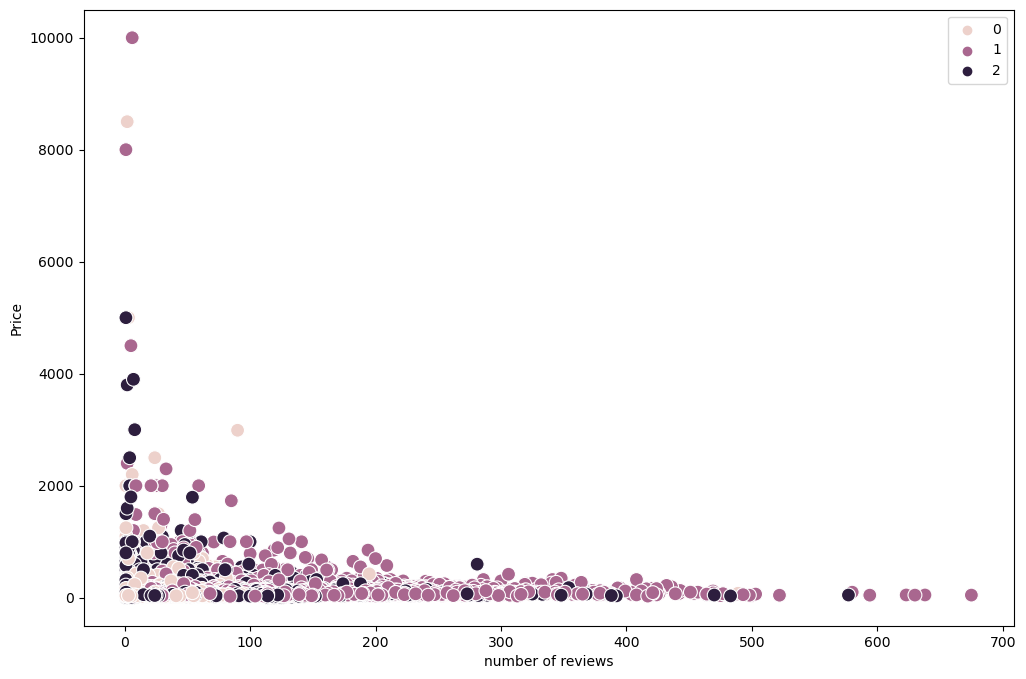

In [18]:
# Plot the clusters for the "number of reviews" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['number_of_reviews'], y=df_numeric['price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('number of reviews') 
plt.ylabel('Price') 
plt.show()

##### the clusters reveal a non-linear relationship between the number of reviews and the price. Cluster 1 suggests that properties with fewer reviews tend to be cheaper. Cluster 0 has a mix of review counts but generally lower prices. In contrast, cluster 2 indicates that there are properties with a range of review counts that are priced higher, which could imply that factors other than the number of reviews are influencing the price.

#### Descriptive analysis with clusters to check individual statistics

In [19]:
# Assign color names to 'cluster' column based on 'clusters' values.

df_numeric.loc[df_numeric['clusters'] == 2, 'cluster'] = 'dark purple'
df_numeric.loc[df_numeric['clusters'] == 1, 'cluster'] = 'purple'
df_numeric.loc[df_numeric['clusters'] == 0, 'cluster'] = 'pink'

In [20]:
# group and Aggregate mean and median for various features within each cluster.
# Use the groupby() function to separate the data points in each cluster and calculate their descriptive statistics.

df_numeric.groupby('cluster').agg({'price':['mean', 'median'], 
                         'days_occupied_in_2019':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median'],
                         'reviews_per_month':['mean', 'median'],
                         'availability_2020':['mean', 'median'],
                          'minimum_nights':['mean', 'median']})

price        days_occupied_in_2019        number_of_reviews  \
                   mean median                  mean median              mean   
cluster                                                                         
dark purple  145.835845  107.5            187.392178  206.0         56.744169   
pink         135.249546  100.0            208.984486  240.0         30.878198   
purple       155.440060  120.0            142.327872   98.0         81.135763   

                   reviews_per_month        availability_2020         \
            median              mean median              mean median   
cluster                                                                
dark purple   38.0          1.702201   1.18        152.824543  125.0   
pink          20.0          1.804793   1.21        131.969467   81.0   
purple        52.0          1.318081   0.85        177.869085  169.0   

            minimum_nights         
                      mean median  
cluster                            
dark purple       7.485289    3.0  
pink              5.976894    2.0  
purple            8.741348    3.0

In [22]:
df_numeric.head()

,id,latitude,longitude,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020,clusters,cluster
0,2595,40.75362,-73.98377,225,15,10,48,0.39,1,1,purple
1,3831,40.68514,-73.95976,89,188,1,295,4.67,1,1,purple
2,5099,40.74767,-73.97500,200,362,3,78,0.60,19,1,purple
3,5121,40.68688,-73.95596,60,0,29,49,0.38,365,1,purple
4,5178,40.76489,-73.98493,79,141,2,454,3.52,242,1,purple


In [23]:
df_rentals.head()

,id,neighborhood,latitude,longitude,room_type,price,days_occupied_in_2019,minimum_nights,number_of_reviews,reviews_per_month,availability_2020,Price category
0,2595,Midtown,40.75362,-73.98377,Entire home/apt,225,15,10,48,0.39,1,Middle price
1,3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,188,1,295,4.67,1,Low price
2,5099,Manhattan,40.74767,-73.97500,Entire home/apt,200,362,3,78,0.60,19,Middle price
3,5121,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,0,29,49,0.38,365,Low price
4,5178,Manhattan,40.76489,-73.98493,Private room,79,141,2,454,3.52,242,Low price


##### The 'dark purple' cluster seems to be the best for occupancy (days occupied) and guest turnover (reviews per month), with reasonable prices and the lowest barriers to booking (minimum nights).
##### The 'pink' cluster commands the highest prices and has the greatest popularity (number of reviews), combined with high future availability, which could suggest a potential for high revenue if the occupancy can be maximized.
##### The 'purple' cluster sits in the middle ground in most categories, suggesting a balance but not leading in any particular aspect.

##### This results would be useful in Segmentation and Targeting Understanding the characteristics of each cluster to help in creating tailored marketing strategies. For example, listings in the 'dark purple' cluster with higher prices and occupancy might be targeted for premium services, while those in the 'pink' cluster could be aimed at budget-conscious customers.

# 4. Export data

In [24]:
df_numeric.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'rental_merged_clusters.csv'))